In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = pd.read_csv("D:\Capstone\Databases\ML CSV\CUDB_VFDB_combined.csv")

In [ ]:
df.shape

(12775, 12)

In [ ]:
# Separate the data into two classes
class_0 = df[df["rhythm"] == 0]
class_1 = df[df["rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
balanced_df = balanced_df.sample(frac=1, random_state=100)

In [ ]:
print(balanced_df['rhythm'].value_counts())

rhythm
0    2399
1    2399
Name: count, dtype: int64


In [ ]:
#X = balanced_df.drop(columns=['std_dev','rhythm','segment_energy'])
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ... (Your existing code to load and prepare the data 'X')

# Calculate the correlation matrix
corr_matrix = balanced_df.corr()

# Generate the heatmap with Seaborn
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Customize the plot
plt.title('Correlation Matrix of ECG Features')
plt.show()


In [ ]:
import time

start_time = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy',accuracy_score(y_train, y_train_predict))
print('Test accuracy',accuracy_score(y_test,y_predict))
end_time = time.time()
execution_time = end_time - start_time
print("Execution time: %s seconds" % execution_time)

Train accuracy 1.0
Test accuracy 0.9333333333333333
Execution time: 0.10544037818908691 seconds


In [ ]:
X.shape

(4798, 11)

In [ ]:
# Initialize lists to store accuracy values per epoch
train_acc_history = []
val_acc_history = []

# Loop through a specific number of epochs (adjust as needed)
for i in range(100):  # Adjust the number of epochs
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False,
              eval_metric='error')  # Use built-in 'error' metric

    # Get training and validation error for current epoch
    train_error = model.evals_result()['validation_0']['error'][i]
    val_error = model.evals_result()['validation_1']['error'][i]

    # Calculate accuracy from error (assuming classification problem)
    train_acc = 1 - train_error  # Assuming classification problem
    val_acc = 1 - val_error  # Assuming classification problem

    # Append accuracy values to respective lists
    train_acc_history.append(train_acc)
    val_acc_history.append(val_acc)

# Create the epochs vs accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history, label='Training Accuracy')
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(axis='y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
import xgboost as xgb
'''
model = xgb.XGBClassifier(colsample_bytree = 0.816432335230161,
gamma = 0,
learning_rate = 0.060309950161179966,
max_depth = 10,
n_estimators = 500,
reg_alpha = 0,
reg_lambda = 7,
subsample = 0.9946951308154663)
'''
'''
model = xgb.XGBClassifier(colsample_bytree = 1,
gamma = 0,
learning_rate = 0.17901706233426795,
max_depth = 10,
n_estimators = 366,
reg_alpha = 0,
reg_lambda = 5,
subsample = 1)
'''
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy',accuracy_score(y_train, y_train_predict))
print('Test accuracy',accuracy_score(y_test,y_predict))

Train accuracy 1.0
Test accuracy 0.9364583333333333


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict) * 100
print("Accuracy: {:.2f}".format(accuracy))

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_predict) * 100
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
specificity = (tn / (tn + fp)) * 100
print("Specificity: {:.2f}".format(specificity))

# Calculate precision
precision = precision_score(y_test, y_predict) * 100
print("Precision: {:.2f}".format(precision))

# Calculate NPV
npv = (tn / (tn + fn)) * 100
print("Negative Predictive Value (NPV): {:.2f}".format(npv))

# Calculate AUC-ROC
y_predict_proba = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_predict_proba) * 100
print("AUC-ROC: {:.2f}".format(auc_roc))

Accuracy: 93.65
Sensitivity: 95.14
Specificity: 92.20
Precision: 92.21
Negative Predictive Value (NPV): 95.13
AUC-ROC: 98.21


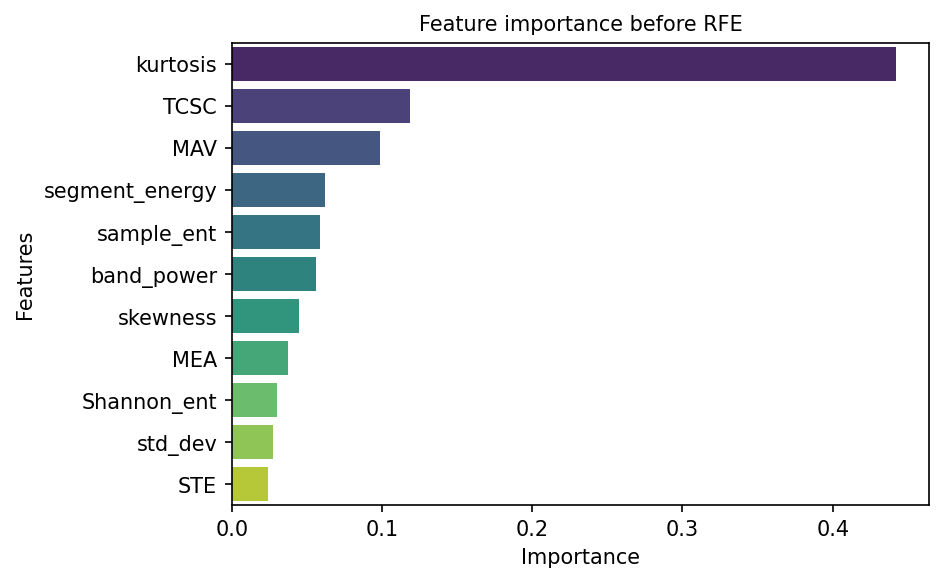

In [ ]:
# Plot feature importance
plt.figure(figsize=(6, 4), dpi=150)
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.title("Feature importance before RFE", fontsize = 10)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # Assuming 5-fold cross-validation

# Multiply by 100 and round to two decimal places
#cv_scores = (cv_scores * 100).round(2)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.93541667 0.92604167 0.925      0.93117831 0.93534932]
Mean cross-validation score: 0.9305971932568647


# **Before and after Bayesian optimization**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score
'''
# Train the model
model = xgb.XGBClassifier(colsample_bytree = 0.816432335230161,
gamma = 0,
learning_rate = 0.060309950161179966,
max_depth = 10,
n_estimators = 500,
reg_alpha = 0,
reg_lambda = 7,
subsample = 0.9946951308154663)'''
model = xgb.XGBClassifier()

model.fit(X_train, y_train)

# Predict on the test set
y_predict = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict) * 100

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

# Calculate sensitivity, specificity, precision, NPV
sensitivity = recall_score(y_test, y_predict) * 100
specificity = (tn / (tn + fp)) * 100
precision = precision_score(y_test, y_predict) * 100
npv = (tn / (tn + fn)) * 100

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba) * 100

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Precision: {precision:.2f}')
print(f'NPV: {npv:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')


Accuracy: 94.17
Sensitivity: 83.03
Specificity: 96.81
Precision: 86.02
NPV: 96.02
AUC-ROC: 97.87


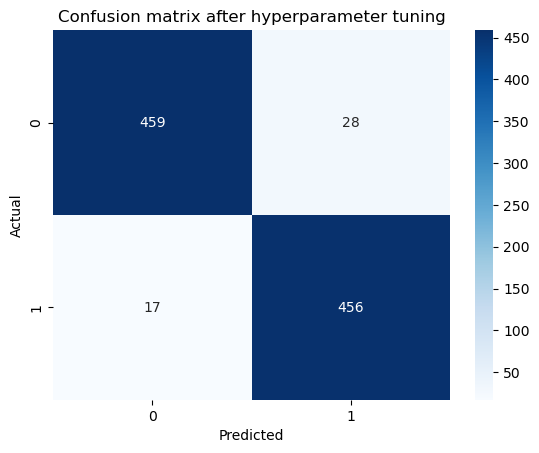

In [ ]:
#Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_predict)
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix after hyperparameter tuning')
plt.show()

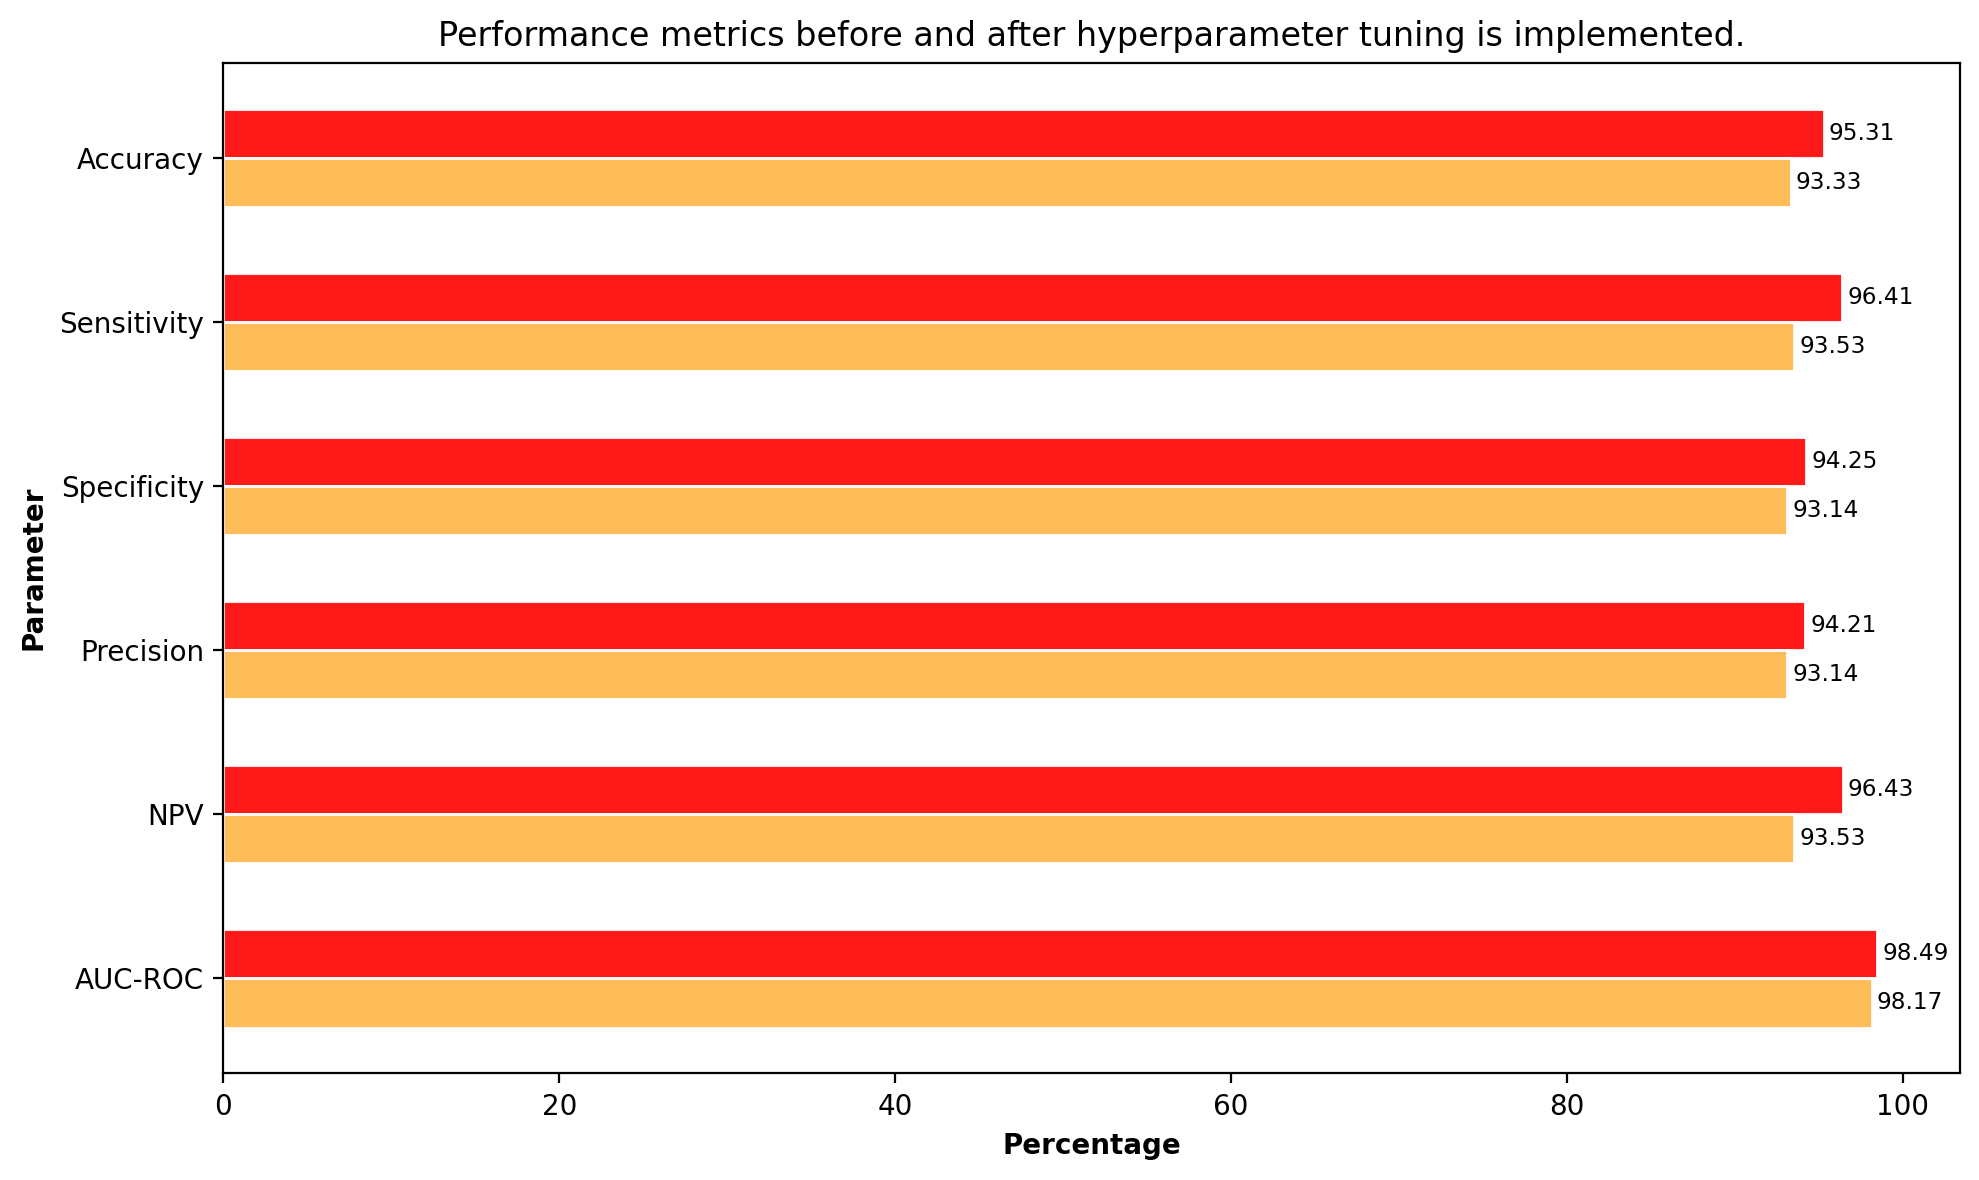

In [ ]:
import matplotlib.pyplot as plt

# Evaluation parameters before and after Bayesian optimization
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'NPV', 'AUC-ROC']
before_values = [93.33, 93.53, 93.14, 93.14, 93.53, 98.17]
after_values = [95.31, 96.41, 94.25, 94.21, 96.43, 98.49]

# Reverse the order
metrics.reverse()
before_values.reverse()
after_values.reverse()

# Bar width
bar_width = 0.3

# Set position of bar on X axis
r1 = range(len(metrics))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(10, 6), dpi=200)
bars2 = plt.barh(r2, after_values, color='#ff1919', height=bar_width, edgecolor='white', label='After')
bars1 = plt.barh(r1, before_values, color='#ffbd59', height=bar_width, edgecolor='white', label='Before')

# Adding labels
plt.yticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.ylabel('Parameter', fontweight='bold')
plt.xlabel('Percentage', fontweight='bold')
plt.title('Performance metrics before and after hyperparameter tuning is implemented.')

# Add values beside bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_width()+0.30, bar1.get_y() + bar1.get_height()/2, f'{bar1.get_width()}', va='center', ha='left',fontsize='smaller')
    plt.text(bar2.get_width()+0.30, bar2.get_y() + bar2.get_height()/2, f'{bar2.get_width()}', va='center', ha='left',fontsize='smaller')
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# Show plot
plt.tight_layout()
plt.show()


# **Feature selection**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
model = XGBClassifier()


In [ ]:
# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

In [ ]:
# Fit RFECV to the training data
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...),
      scoring='accuracy')

In [ ]:
# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)

Optimal number of features:  9


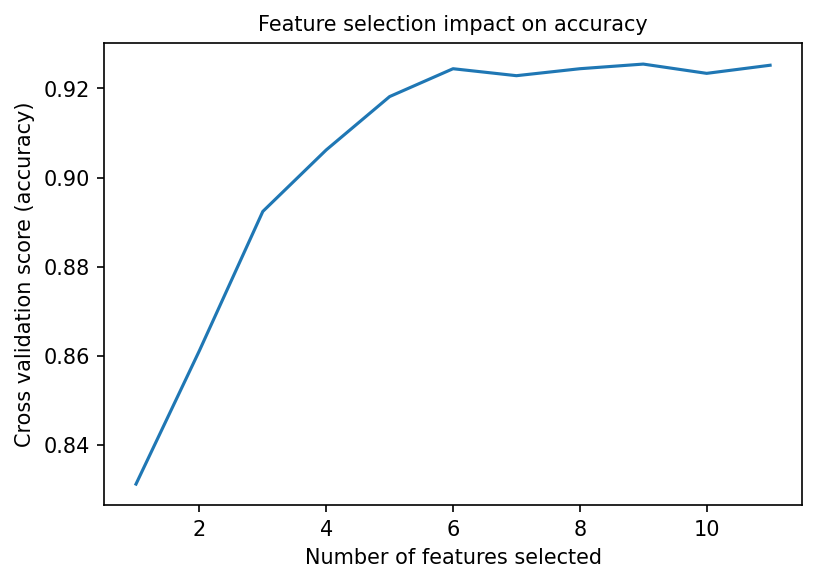

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(6, 4),dpi=150)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.title("Feature selection impact on accuracy", fontsize = 10)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
# Get selected features
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

Selected features: Index(['TCSC', 'MAV', 'MEA', 'Shannon_ent', 'sample_ent', 'band_power',
       'segment_energy', 'skewness', 'kurtosis'],
      dtype='object')


In [ ]:
# Transform the data with selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

In [ ]:
# Train the model with selected features
model.fit(X_train_selected, y_train)

# Predictions on training and testing data
y_train_predict = model.predict(X_train_selected)
y_test_predict = model.predict(X_test_selected)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Train accuracy: 1.0
Test accuracy: 0.9385416666666667


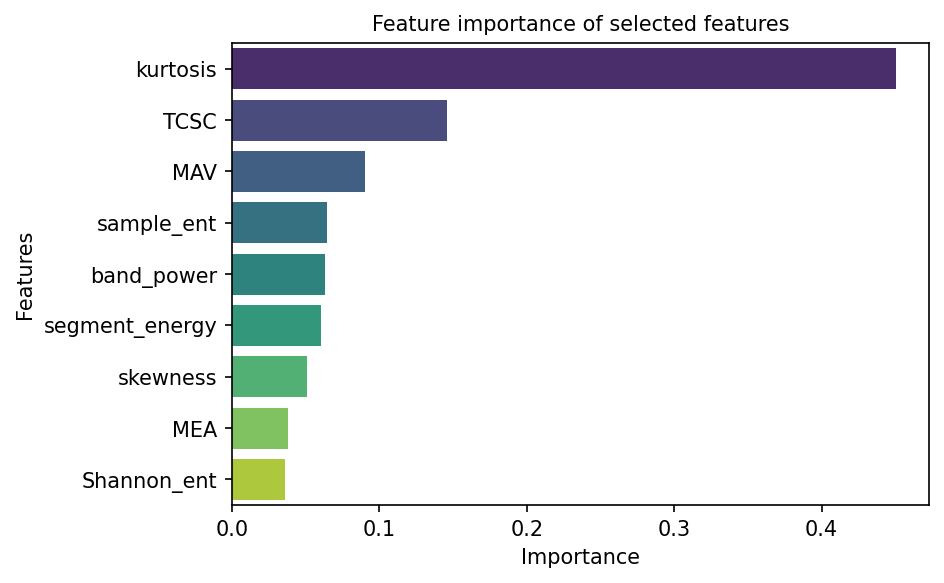

In [ ]:
# Get selected features
selected_features = X.columns[rfecv.support_]

# Get feature importances from the fitted XGBoost model
feature_importances = model.feature_importances_

# Create a DataFrame for easy plotting
df_importances = pd.DataFrame({'feature': selected_features, 'importance': feature_importances})

# Sort by importance (descending)
df_importances = df_importances.sort_values('importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(6, 4), dpi=150)
sns.barplot(x='importance', y='feature', data=df_importances,palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importance of selected features', fontsize=10)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_predict) * 100
print("Accuracy: {:.2f}".format(accuracy))

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_test_predict) * 100
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
specificity = (tn / (tn + fp)) * 100
print("Specificity: {:.2f}".format(specificity))

# Calculate precision
precision = precision_score(y_test, y_test_predict) * 100
print("Precision: {:.2f}".format(precision))

# Calculate NPV
npv = (tn / (tn + fn)) * 100
print("Negative Predictive Value (NPV): {:.2f}".format(npv))

# Calculate AUC-ROC
y_predict_proba = model.predict_proba(X_test_selected)[:, 1]
auc_roc = roc_auc_score(y_test, y_predict_proba) * 100
print("AUC-ROC: {:.2f}".format(auc_roc))

# **Dropped manually**

In [ ]:
X = balanced_df.drop(columns=['rhythm'])
y = balanced_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
X_test.shape, X_train.shape, y_test.shape , y_train.shape

((960, 11), (3838, 11), (960,), (3838,))

In [ ]:
X.columns

Index(['TCSC', 'MAV', 'MEA', 'Shannon_ent', 'sample_ent', 'band_power',
       'segment_energy', 'skewness', 'kurtosis'],
      dtype='object')

In [ ]:
import xgboost as xgb
'''
model = xgb.XGBClassifier(colsample_bytree = 1,
gamma = 0,
learning_rate = 0.17901706233426795,
max_depth = 10,
n_estimators = 366,
reg_alpha = 0,
reg_lambda = 5,
subsample = 1)
'''
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
from sklearn.metrics import accuracy_score
print('Train accuracy',accuracy_score(y_train, y_train_predict))
print('Test accuracy',accuracy_score(y_test,y_predict) )

Train accuracy 1.0
Test accuracy 0.9333333333333333


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict the target variable
y_predict = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict) * 100
print("Accuracy: {:.2f}".format(accuracy))

# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, y_predict) * 100
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
specificity = (tn / (tn + fp)) * 100
print("Specificity: {:.2f}".format(specificity))

# Calculate precision
precision = precision_score(y_test, y_predict) * 100
print("Precision: {:.2f}".format(precision))

# Calculate NPV
npv = (tn / (tn + fn)) * 100
print("Negative Predictive Value (NPV): {:.2f}".format(npv))

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba) * 100
print("AUC-ROC: {:.2f}".format(auc_roc))

Accuracy: 93.33
Sensitivity: 93.53
Specificity: 93.14
Precision: 93.14
Negative Predictive Value (NPV): 93.53
AUC-ROC: 98.17


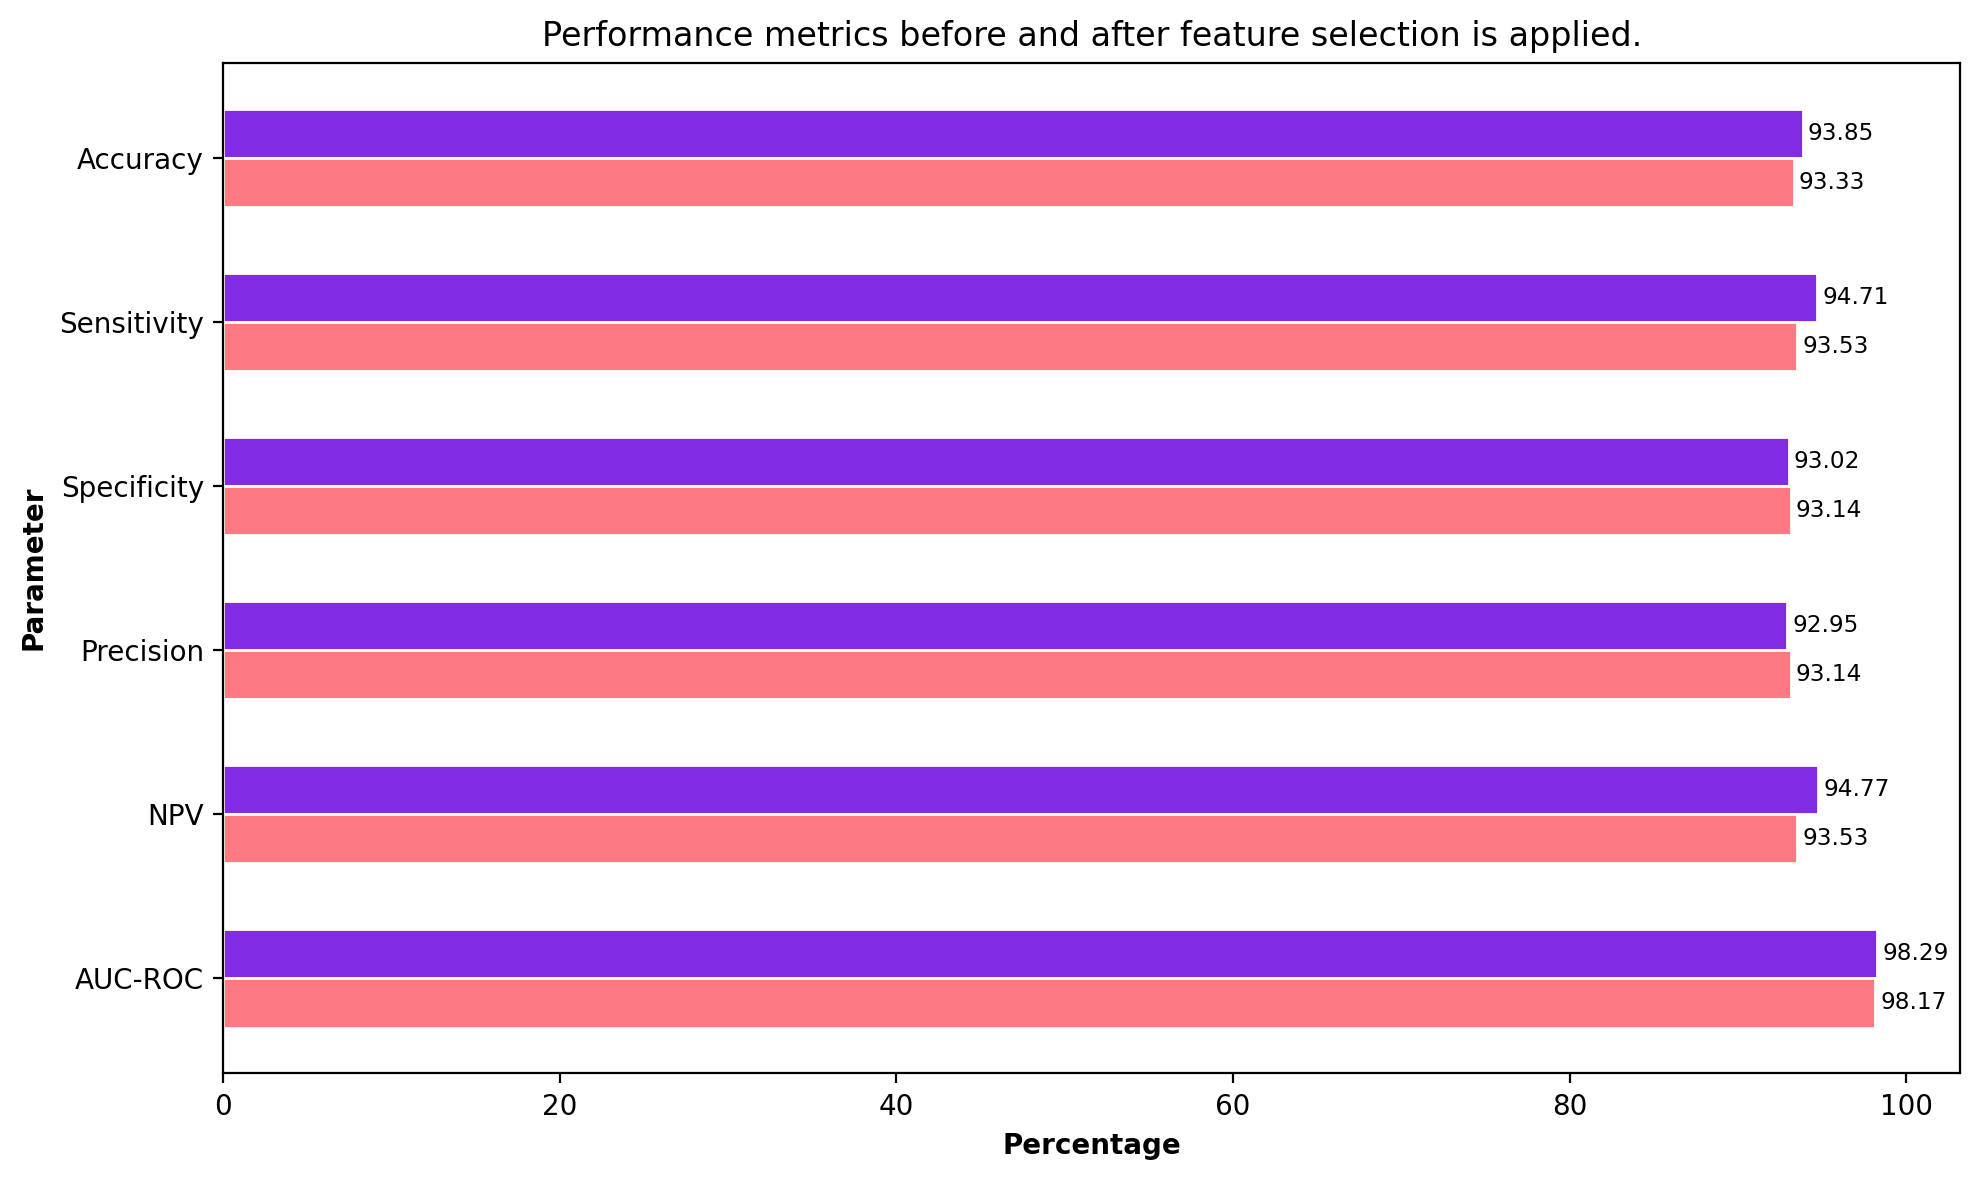

In [ ]:
import matplotlib.pyplot as plt

# Evaluation parameters before and after feature selection
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'NPV', 'AUC-ROC']
before_values = [93.33, 93.53, 93.14, 93.14, 93.53, 98.17]
after_values = [93.85, 94.71, 93.02, 92.95, 94.77, 98.29]

# Reverse the order
metrics.reverse()
before_values.reverse()
after_values.reverse()

# Bar width
bar_width = 0.3

# Set position of bar on X axis
r1 = range(len(metrics))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(10, 6), dpi=200)
bars2 = plt.barh(r2, after_values, color='#812be2', height=bar_width, edgecolor='white', label='After')
bars1 = plt.barh(r1, before_values, color='#fe7a83', height=bar_width, edgecolor='white', label='Before')

# Adding labels
plt.yticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.ylabel('Parameter', fontweight='bold')
plt.xlabel('Percentage', fontweight='bold')
#plt.title('Evaluation Parameters Before and After Feature Selection of XGBoost model')
plt.title('Performance metrics before and after feature selection is applied.')


# Add values beside bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_width()+0.30, bar1.get_y() + bar1.get_height()/2, f'{bar1.get_width()}', va='center', ha='left',fontsize='smaller')
    plt.text(bar2.get_width()+0.30, bar2.get_y() + bar2.get_height()/2, f'{bar2.get_width()}', va='center', ha='left',fontsize='smaller')

# Show legend
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show plot
plt.tight_layout()
plt.show()


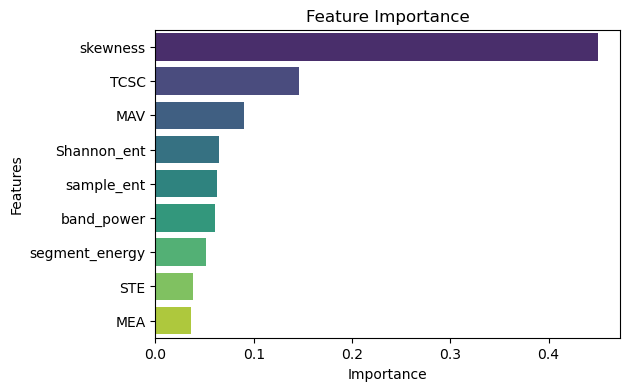

In [ ]:
# Plot feature importance
plt.figure(figsize=(6, 4))
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

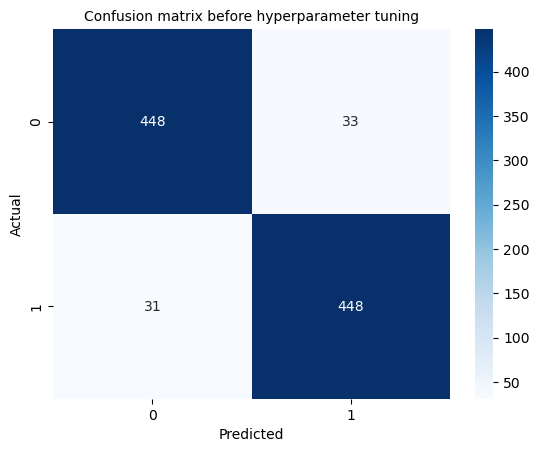

In [ ]:
#Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_predict)
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix before hyperparameter tuning', fontsize = 10)
#plt.figure(figsize=(6, 4), dpi=150)

plt.show()

In [ ]:
total_samples = len(y_test)

# Calculate rates
TP_rate = TP / (TP+FN)
TN_rate = TN / (TN+FP)
FP_rate = FP / (TN+FP)
FN_rate = FN / (TP+FN)

print("True Positives Rate (TPR):", TP_rate*100)
print("True Negatives Rate (TNR):", TN_rate*100)
print("False Positives Rate (FPR):", FP_rate*100)
print("False Negatives Rate (FNR):", FN_rate*100)


In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier(colsample_bytree = 0.9601668873369251,
gamma = 0.1,
learning_rate = 0.14881211421282844,
max_depth = 10,
n_estimators = 161,
reg_alpha = 0,
reg_lambda = 10,
subsample = 0.9949327077366801)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9601668873369251, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.14881211421282844, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=161, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
'''from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)'''

'from sklearn.metrics import confusion_matrix\nconfusion_matrix(y_test, y_pred)'

In [ ]:
'''from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))'''

'from sklearn.metrics import classification_report\nprint(classification_report(y_pred, y_test))'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print sensitivity and specificity
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[461  26]
 [ 24 449]]
Sensitivity: 0.9492600422832981
Specificity: 0.946611909650924
Accuracy: 0.9479166666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       487
           1       0.95      0.95      0.95       473

    accuracy                           0.95       960
   macro avg       0.95      0.95      0.95       960
weighted avg       0.95      0.95      0.95       960



**10 fold cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestClassifier
clf = xgb.XGBClassifier(colsample_bytree = 0.816432335230161,
gamma = 0,
learning_rate = 0.060309950161179966,
max_depth = 10,
n_estimators = 500,
reg_alpha = 0,
reg_lambda = 7,
subsample = 0.9946951308154663)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Calculate the average accuracy
average_accuracy = np.mean(cv_scores)

# Print the average accuracy
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9324708594293668


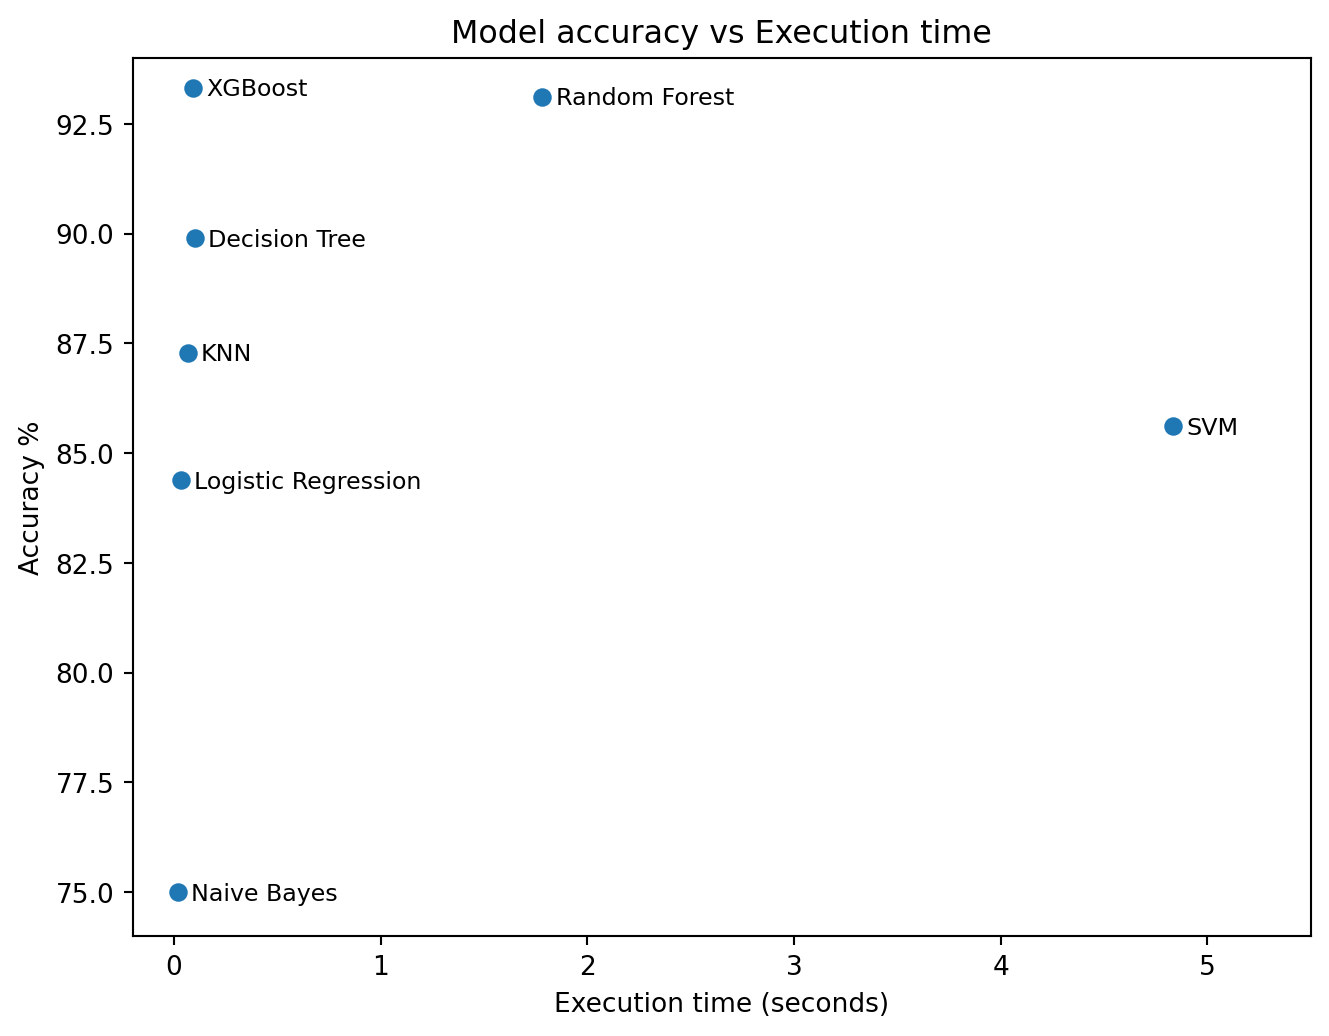

In [ ]:
import matplotlib.pyplot as plt

model_names = ["Naive Bayes", "SVM", "KNN", "Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
accuracy_values = [75.00, 85.62, 87.29, 84.38, 89.90, 93.12, 93.33]
execution_times = [0.0173, 4.8326, 0.0659, 0.0348, 0.0987, 1.7825, 0.0926]

plt.figure(figsize=(8, 6), dpi=190)
plt.scatter(execution_times, accuracy_values)

# Label points
for i, name in enumerate(model_names):
    plt.annotate(name, (execution_times[i], accuracy_values[i]), xytext=(5, -3), textcoords='offset points',fontsize=9)

plt.xlabel('Execution time (seconds)')
plt.ylabel('Accuracy %')
plt.title('Model accuracy vs Execution time')
plt.ylim(74, 94)
plt.xlim(-0.2, 5.5)
plt.show()


# **Bayesian Optimization**

## **Using skopt library**

In [ ]:
# Define the XGBoost classifier
import xgboost as xgb
clf = xgb.XGBClassifier()

# Define the hyperparameter search space
param_space = {
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 5),
    'reg_alpha': (0, 10),
    'reg_lambda': (0, 10),
}

In [ ]:
X_train.shape

(3838, 9)

In [ ]:
# Define the Bayesian optimization object
from skopt import BayesSearchCV
opt = BayesSearchCV(
    clf,
    param_space,
    scoring='accuracy',
    n_iter=50,  # Number of parameter settings that are sampled.
    cv=5,  # Cross-validation fold
    n_jobs=-1,  # Use all CPU cores
)

np.int = int

# Perform Bayesian optimization
opt.fit(X_train, y_train)

# Get the best hyperparameters
best_params = opt.best_params_

In [ ]:
from sklearn.model_selection import cross_val_score

# Calculate average accuracy from cross-validation
cv_scores = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
average_accuracy = cv_scores.mean()

# Print the average_accuracy
print('Average Accuracy (5-fold CV): {:.2f}%'.format(average_accuracy*100))

Average Accuracy (5-fold CV): 92.68%


In [ ]:
#Print the tuned hyperparameters
opt.best_params_

OrderedDict([('colsample_bytree', 1.0),
             ('gamma', 0),
             ('learning_rate', 0.04879828409692211),
             ('max_depth', 10),
             ('n_estimators', 500),
             ('reg_alpha', 0),
             ('reg_lambda', 1),
             ('subsample', 0.9915021488369153)])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_pred = opt.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Hyperparameters: OrderedDict([('colsample_bytree', 1.0), ('gamma', 0), ('learning_rate', 0.04879828409692211), ('max_depth', 10), ('n_estimators', 500), ('reg_alpha', 0), ('reg_lambda', 1), ('subsample', 0.9915021488369153)])
Accuracy: 0.9322916666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       481
           1       0.93      0.94      0.93       479

    accuracy                           0.93       960
   macro avg       0.93      0.93      0.93       960
weighted avg       0.93      0.93      0.93       960



## **Using Hyperopt Library**

In [ ]:
import xgboost as xgb
from hyperopt import hp, tpe, fmin, Trials
from hyperopt import STATUS_OK

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1.0)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 0, 10),
}

In [ ]:
# Define the objective function for hyperparameter optimization
def objective(params):
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Perform hyperparameter optimization using TPE algorithm
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

In [ ]:
# Define the objective function for hyperparameter optimization
def objective(params):
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Define the search space for hyperparameters
space = {
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'gamma': hp.uniform('gamma', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# Perform hyperparameter optimization using TPE algorithm
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)


100%|██████████████████████████████████████████████████████████| 50/50 [00:21<00:00,  2.29trial/s, best loss: -0.94375]


In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", best)

# Create the XGBoost classifier with the best hyperparameters
clf = xgb.XGBClassifier(**best)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Hyperparameters: {'colsample_bytree': 0.6729525714607151, 'gamma': 0.43843891287988646, 'learning_rate': 0.05083986446311046, 'max_depth': 12, 'min_child_weight': 5.0, 'n_estimators': 735, 'subsample': 0.8211873108934007}
Accuracy: 0.9427083333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       487
           1       0.94      0.95      0.94       473

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960



## **Bayesian optimization new**

In [ ]:
# Define the parameter search space for XGBoost
param_space = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'max_depth': Integer(1, 10),
    'n_estimators': Integer(50, 1000),
    'gamma': Real(0.01, 1.0, 'log-uniform'),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 1.0, 'uniform'),
    'reg_alpha': Real(1e-9, 1000, 'log-uniform'),
    'reg_lambda': Real(1e-9, 1000, 'log-uniform')
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Perform Bayesian optimization to maximize accuracy
bayes_search = BayesSearchCV(estimator=xgb_clf, search_spaces=param_space, n_iter=50, cv=5, scoring='accuracy')
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters and the best accuracy
best_params = bayes_search.best_params_
best_accuracy = bayes_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Evaluate the model on test data
y_pred_test = best_xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.9485694556458993), ('gamma', 0.56942903575701), ('learning_rate', 0.03014956437779849), ('max_depth', 4), ('n_estimators', 723), ('reg_alpha', 0.005694959064182671), ('reg_lambda', 0.667483212553906), ('subsample', 0.5566757864790689)])
Best Accuracy: 0.9283453525641026
Test Accuracy: 0.9375


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import accuracy_score

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1.0)),
    'max_depth': hp.choice('max_depth', range(1, 11)),
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 1),
    'gamma': hp.loguniform('gamma', np.log(0.01), np.log(1.0)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.loguniform('reg_alpha', np.log(1e-9), np.log(1000)),
    'reg_lambda': hp.loguniform('reg_lambda', np.log(1e-9), np.log(1000))
}

# Define the objective function to maximize accuracy
def objective(params):
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Perform Bayesian optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best Hyperparameters:", best)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import hyperopt
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Define the parameter search space
param_space = {
    'max_depth': hp.choice('max_depth', range(3, 16)),  # Integer values
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', range(50, 501)),  # Integer values
    'gamma': hp.uniform('gamma', 0, 10),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha':  hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 0, 10)
}

# Define the objective function to minimize (for maximization, return -accuracy)
def xgboost_objective(params):
    model = xgb.XGBClassifier(**params)  # Unpack parameter dictionary
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}  # Hyperopt minimizes

# Create trials object for storing results
trials = Trials()

# Run Bayesian optimization (using the TPE algorithm)
best = fmin(
    fn=xgboost_objective,
    space=param_space,
    algo=tpe.suggest,
    max_evals=200,  # Number of optimization trials
    trials=trials
)

# Get the best hyperparameters
best_params = hyperopt.space_eval(param_space, best)

# Access the best results (note: accuracy is negated in the objective function)
print("Best accuracy:", -trials.best_trial['result']['loss'])
print("Best parameters:", best_params)


100%|█████████████████████████████████████████████| 200/200 [00:34<00:00,  5.82trial/s, best loss: -0.9416666666666667]
Best accuracy: 0.9416666666666667
Best parameters: {'colsample_bytree': 0.5345835187592807, 'gamma': 0.5425631266788754, 'learning_rate': 0.2770875757022302, 'max_depth': 15, 'n_estimators': 486, 'reg_alpha': 0.6151063977829543, 'reg_lambda': 3.6469343935344405, 'subsample': 0.8323119902329539}


# **Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the XGBoost classifier
clf = XGBClassifier()

# Define the hyperparameter search space
param_space = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3, 4, 5],
    'reg_alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid=param_space, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_



In [ ]:

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# **Randomized search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the XGBoost classifier
clf = xgb.XGBClassifier()

# Define the hyperparameter search space (same as for Bayesian optimization)
param_space = {
    'n_estimators': range(50, 501),
    'max_depth': range(3, 11),
    'learning_rate': [0.01, 0.1, 1.0],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'gamma': [0, 1, 2, 3, 4, 5],
    'reg_alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Define the RandomizedSearchCV object with 50 iterations
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_space,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'subsample': 0.5, 'reg_lambda': 8, 'reg_alpha': 2, 'n_estimators': 451, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
# Make predictions on the test set using the best model
y_pred = random_search.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9364583333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       487
           1       0.92      0.95      0.94       473

    accuracy                           0.94       960
   macro avg       0.94      0.94      0.94       960
weighted avg       0.94      0.94      0.94       960



In [ ]:
# Calculate 5-fold cross-validation score
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print(mean_cv_score)

0.9252193339852239
